# Sentiment analyisis on CTS feedback Dataset

## Importing packages and loading data

In [1]:
!pip install networkx

In [2]:
import os
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#loading all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import collections
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import pandas as pd
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from nltk.util import ngrams
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer



os.chdir(r"C:\Users\D3\Desktop\Machine Learning\Datasets")

df = pd.read_csv("CTS_feedback.csv")

lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')
df.head()

,Date,Pros,Cons,Advice to Management,Rating,Employement_status,Designation,Location,Work_Life_Bal,Culture_Values,Career_Opportunity,Compensation_Benefits,Senior Management
0,05-May-20,Good work life balance.\nLearning opportunitie...,Not much as of now.,NaN,5,Current Employee,Programmer Analyst,Calcutta,5.0,3.0,5.0,5.0,3.0
1,14-Mar-16,"I joined Cognizant in August, 2015 as a freshe...",1. It is often tough for a fresher to get his/...,Lots of. I am listing only few of them. First ...,5,Current Employee,Programmer Analyst Trainee,Bangalore,5.0,2.0,2.0,2.0,1.0
2,11-Jun-20,good in work life balance.,i feel worst middle level management.,NaN,5,Current Employee,Associate,Ahmedabad,5.0,5.0,5.0,5.0,5.0
3,11-Jun-20,Work life balance\nGood opportunity for learning,I don't find anything its great place to work,NaN,5,Current Employee,Software Developer,Pune,5.0,5.0,5.0,5.0,5.0
4,11-Jun-20,Freedom in taking decision and driving indepen...,off late not 'associate' friendly,NaN,4,Current Employee,Test Program Manager,Chennai,3.0,1.0,2.0,2.0,2.0


### function for lowering font, removing punctation, word tokenizing and lemmatize

In [3]:
def text_prep(x):
     corp = str(x).lower()
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip()
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]

     return lemmatize

In [4]:
preprocess_tag = [" ".join(text_prep(i)) for i in df['Pros']]    # " ".join 
df["preprocess_txt"] = preprocess_tag
df["preprocess_txt"].head()

0    good work life balance learning opportunity mn...
1    joined cognizant august fresher fortunately go...
2                               good work life balance
3          work life balance good opportunity learning
4        freedom taking decision driving independently
Name: preprocess_txt, dtype: object

In [5]:
sent = SentimentIntensityAnalyzer()

### Getting sentiment socre

In [6]:
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in df["preprocess_txt"]]
df['sentiment_score'] = polarity
df.head()

,Date,Pros,Cons,Advice to Management,Rating,Employement_status,Designation,Location,Work_Life_Bal,Culture_Values,Career_Opportunity,Compensation_Benefits,Senior Management,preprocess_txt,sentiment_score
0,05-May-20,Good work life balance.\nLearning opportunitie...,Not much as of now.,NaN,5,Current Employee,Programmer Analyst,Calcutta,5.0,3.0,5.0,5.0,3.0,good work life balance learning opportunity mn...,0.82
1,14-Mar-16,"I joined Cognizant in August, 2015 as a freshe...",1. It is often tough for a fresher to get his/...,Lots of. I am listing only few of them. First ...,5,Current Employee,Programmer Analyst Trainee,Bangalore,5.0,2.0,2.0,2.0,1.0,joined cognizant august fresher fortunately go...,0.89
2,11-Jun-20,good in work life balance.,i feel worst middle level management.,NaN,5,Current Employee,Associate,Ahmedabad,5.0,5.0,5.0,5.0,5.0,good work life balance,0.44
3,11-Jun-20,Work life balance\nGood opportunity for learning,I don't find anything its great place to work,NaN,5,Current Employee,Software Developer,Pune,5.0,5.0,5.0,5.0,5.0,work life balance good opportunity learning,0.69
4,11-Jun-20,Freedom in taking decision and driving indepen...,off late not 'associate' friendly,NaN,4,Current Employee,Test Program Manager,Chennai,3.0,1.0,2.0,2.0,2.0,freedom taking decision driving independently,0.64


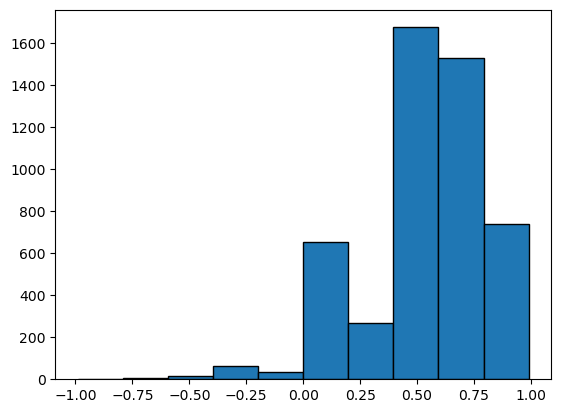

In [7]:
plt.hist(df["sentiment_score"],edgecolor='black')
plt.show()

In [8]:
df['sentiment_score'].describe()

count    4988.000000
mean        0.502646
std         0.288567
min        -0.990000
25%         0.420000
50%         0.490000
75%         0.700000
max         0.990000
Name: sentiment_score, dtype: float64

## setting threshold

In [9]:
# Assuming you have already executed the sentiment analysis code and defined the threshold
threshold = -0.25
# Count the number of reviews with negative sentiment scores
negative_reviews_count = df[df['sentiment_score'] < threshold].shape[0]

print("Number of reviews with negative sentiment score:", negative_reviews_count)

Number of reviews with negative sentiment score: 84


In [10]:
# Define the lower and upper thresholds

lower_threshold = -0.25
upper_threshold = 1

# Filter the DataFrame based on the threshold range

filtered_df = df[(df['sentiment_score'] >= lower_threshold) & (df['sentiment_score'] <= upper_threshold)]

# Get the 'preprocess_txt' column from the filtered DataFrame

filtered_text_column = filtered_df['preprocess_txt']


In [11]:
df['filtered_text'] = filtered_text_column
df.head()

,Date,Pros,Cons,Advice to Management,Rating,Employement_status,Designation,Location,Work_Life_Bal,Culture_Values,Career_Opportunity,Compensation_Benefits,Senior Management,preprocess_txt,sentiment_score,filtered_text
0,05-May-20,Good work life balance.\nLearning opportunitie...,Not much as of now.,NaN,5,Current Employee,Programmer Analyst,Calcutta,5.0,3.0,5.0,5.0,3.0,good work life balance learning opportunity mn...,0.82,good work life balance learning opportunity mn...
1,14-Mar-16,"I joined Cognizant in August, 2015 as a freshe...",1. It is often tough for a fresher to get his/...,Lots of. I am listing only few of them. First ...,5,Current Employee,Programmer Analyst Trainee,Bangalore,5.0,2.0,2.0,2.0,1.0,joined cognizant august fresher fortunately go...,0.89,joined cognizant august fresher fortunately go...
2,11-Jun-20,good in work life balance.,i feel worst middle level management.,NaN,5,Current Employee,Associate,Ahmedabad,5.0,5.0,5.0,5.0,5.0,good work life balance,0.44,good work life balance
3,11-Jun-20,Work life balance\nGood opportunity for learning,I don't find anything its great place to work,NaN,5,Current Employee,Software Developer,Pune,5.0,5.0,5.0,5.0,5.0,work life balance good opportunity learning,0.69,work life balance good opportunity learning
4,11-Jun-20,Freedom in taking decision and driving indepen...,off late not 'associate' friendly,NaN,4,Current Employee,Test Program Manager,Chennai,3.0,1.0,2.0,2.0,2.0,freedom taking decision driving independently,0.64,freedom taking decision driving independently


## Now Creating word cloud

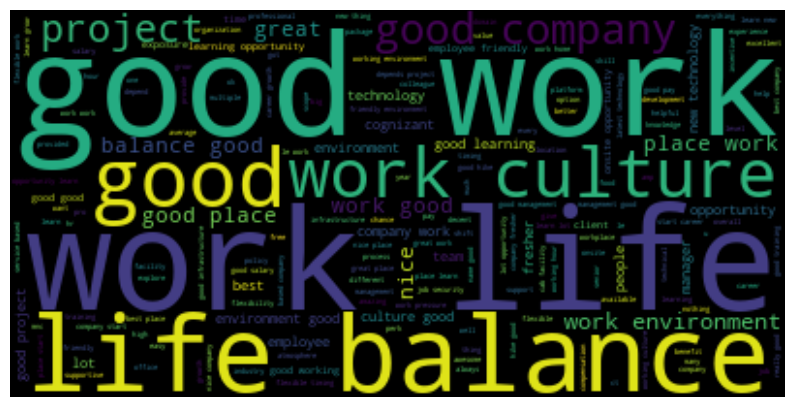

In [12]:
# Filter out None values from the 'filtered_text' column
filtered_text = df['filtered_text'].dropna()

# Concatenate all text data into a single string
text = ' '.join(filtered_text)

# Create a WordCloud object
wc = wordcloud.WordCloud()

# Generate the word cloud
wordcloud_image = wc.generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis('off')
plt.show()

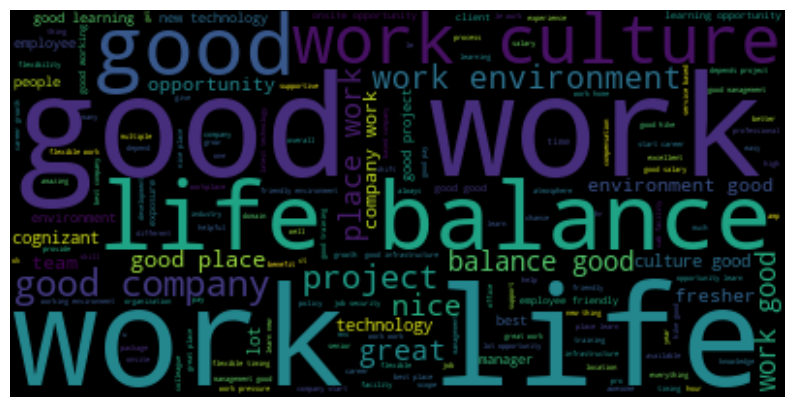

In [13]:
# Filter out None values from the 'filtered_text' column
filtered_text = df['filtered_text'].dropna()

# Concatenate all text data into a single string
text = ' '.join(filtered_text)

# Create a WordCloud object
wc = wordcloud.WordCloud()

# Generate the word cloud
wordcloud_image = wc.generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
def get_ngrams(text, n=2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []

    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
    except(RuntimeError):
        pass

    return ' '.join(returnVal).strip()

In [15]:
df['bigram_text'] = df["filtered_text"].apply(get_ngrams, n=2)

In [16]:
df["trigram_text"] = df["filtered_text"].apply(get_ngrams, n=3)

In [17]:
Bigram_string_list = df['bigram_text'].tolist()
bigram_string = ' '.join(Bigram_string_list)

In [18]:
from wordcloud import WordCloud   # for the wordcloud
wordcloud = WordCloud(width = 2000, height = 1334, random_state=1,
                      background_color='black', colormap='Pastel1',
                      max_words = 75, collocations=False, normalize_plurals=False).generate(bigram_string)

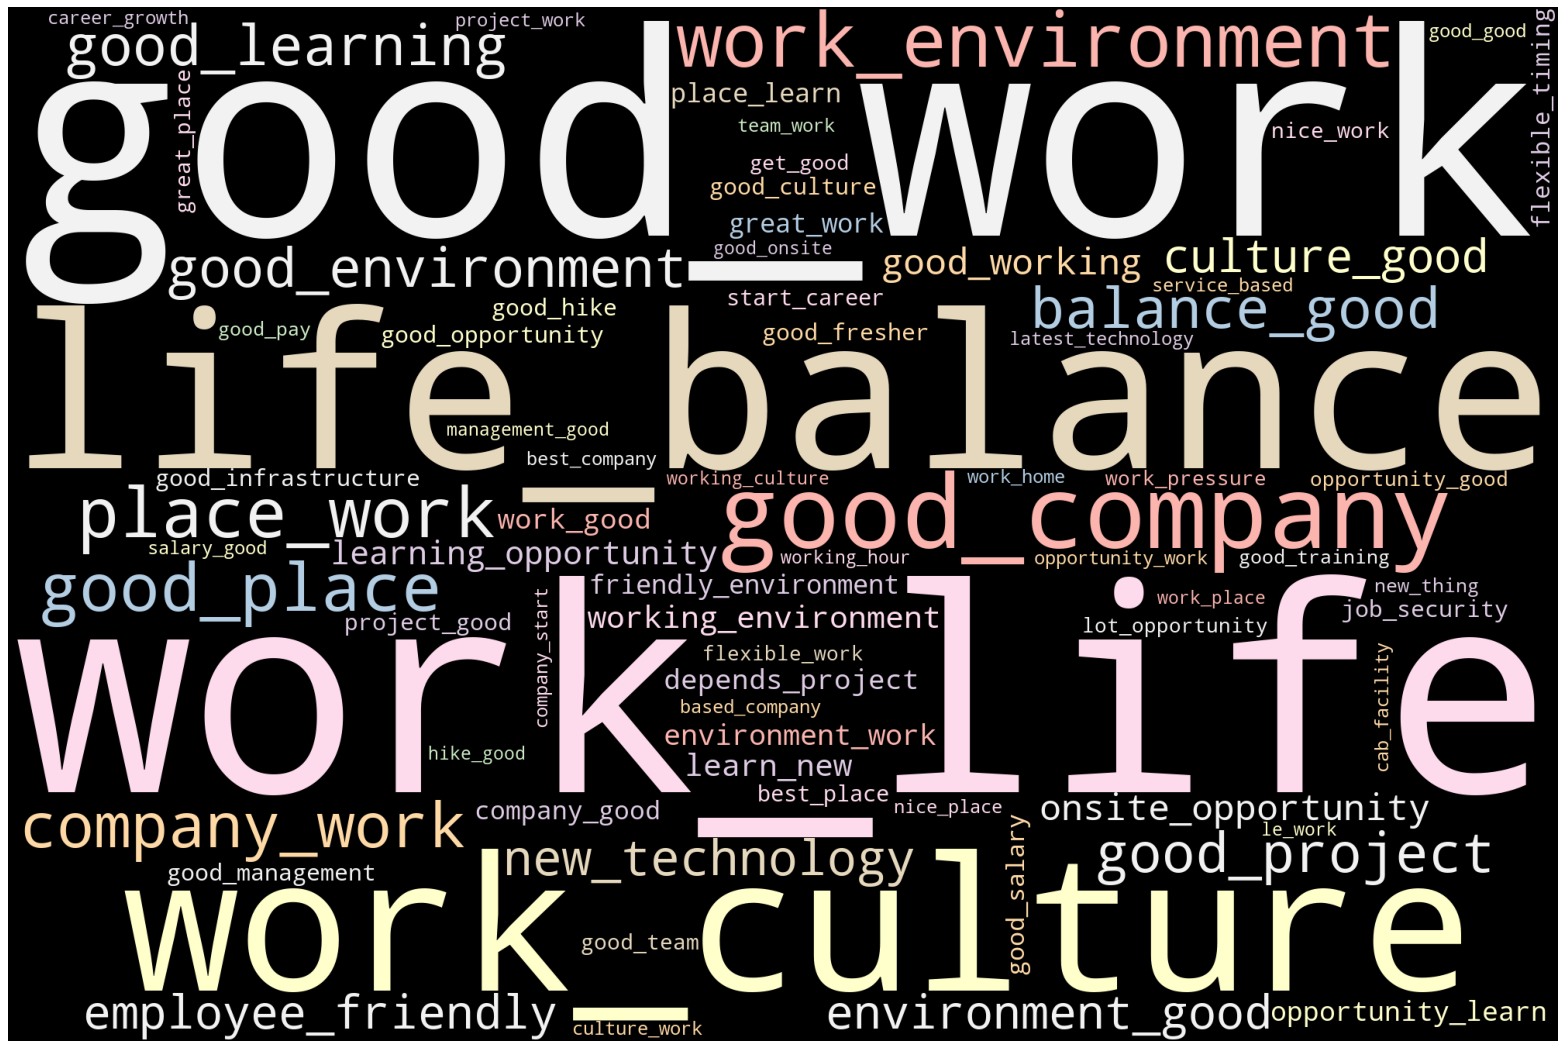

In [19]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(25, 17), dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close()

#Plot
plot_cloud(wordcloud)

In [20]:
Trigram_string_list = df['trigram_text'].tolist()
Trigram_string = ' '.join(Trigram_string_list)

In [21]:
wordcloud = WordCloud(width = 2000, height = 1334, random_state=1,
                      background_color='black', colormap='Pastel1',
                      max_words = 40, collocations=False, normalize_plurals=False).generate(Trigram_string)

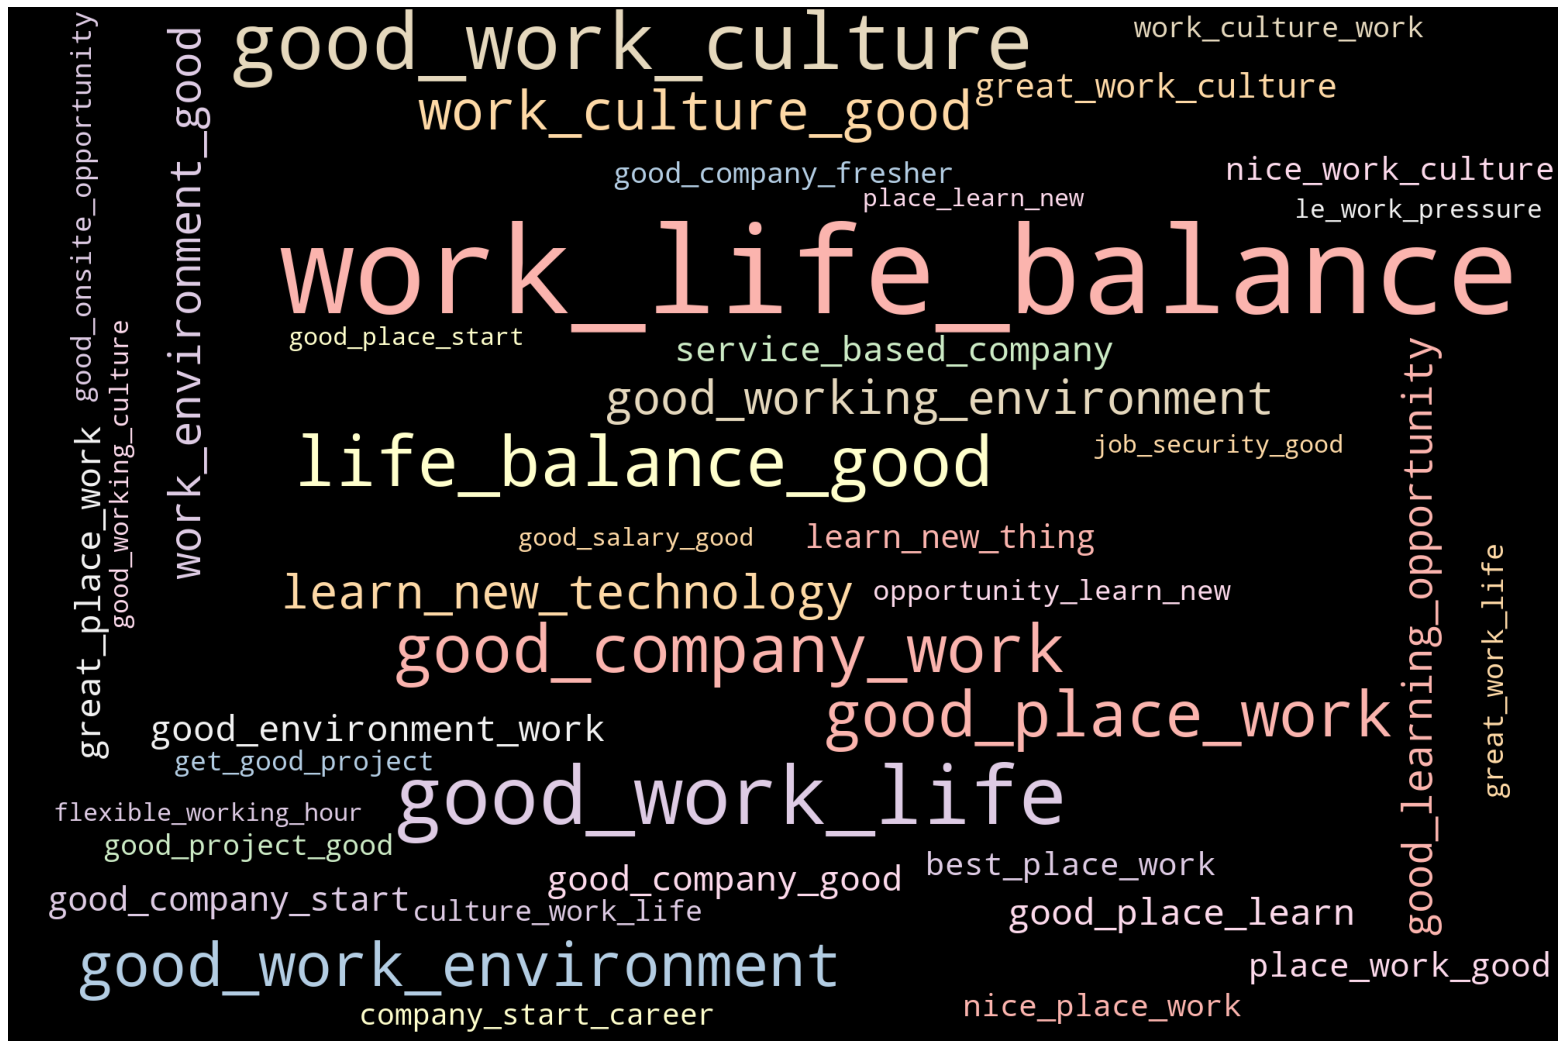

In [22]:
plot_cloud(wordcloud)

# text Sumarization

## Split Text into Sentences

In [23]:
top_reviews = df.nlargest(50, 'sentiment_score')['sentiment_score']

In [24]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Assuming preprocess_txt contains the reviews
# Calculate sentiment scores for each review
df['sentiment_score'] = df['preprocess_txt'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Get top 50 reviews based on sentiment_score
top_50_reviews = df.nlargest(50, 'sentiment_score')['preprocess_txt']

print(top_50_reviews)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\D3\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


3816    important pro cognizant give employee good fle...
640     joined cognizant technology solution ct senior...
1546    company definitely yes employee well taken car...
393     technically professional growth guaranteed wor...
2002    worked year initially company great fun work l...
4771    employee benefit work culture flexibility free...
2313    best company work good management career growt...
3162    good benefit like gym facility lot fun friday ...
3893    get good project great scope good chance caree...
2943    maintains industry standard good learning oppo...
3347    cognizant huge organization team managed compl...
1830    cognizant place helped great deal professional...
809     wider opportunity good brand value work life b...
2254    good improving skill good opportunity technica...
4019    good work culture friendly environment lot ext...
664     good salary good onsite opportunity talent app...
4448    great work life balance good learning curve pl...
1766    excell

In [25]:
df.head()

,Date,Pros,Cons,Advice to Management,Rating,Employement_status,Designation,Location,Work_Life_Bal,Culture_Values,Career_Opportunity,Compensation_Benefits,Senior Management,preprocess_txt,sentiment_score,filtered_text,bigram_text,trigram_text
0,05-May-20,Good work life balance.\nLearning opportunitie...,Not much as of now.,NaN,5,Current Employee,Programmer Analyst,Calcutta,5.0,3.0,5.0,5.0,3.0,good work life balance learning opportunity mn...,0.8176,good work life balance learning opportunity mn...,good_work work_life life_balance balance_learn...,good_work_life work_life_balance life_balance_...
1,14-Mar-16,"I joined Cognizant in August, 2015 as a freshe...",1. It is often tough for a fresher to get his/...,Lots of. I am listing only few of them. First ...,5,Current Employee,Programmer Analyst Trainee,Bangalore,5.0,2.0,2.0,2.0,1.0,joined cognizant august fresher fortunately go...,0.8934,joined cognizant august fresher fortunately go...,joined_cognizant cognizant_august august_fresh...,joined_cognizant_august cognizant_august_fresh...
2,11-Jun-20,good in work life balance.,i feel worst middle level management.,NaN,5,Current Employee,Associate,Ahmedabad,5.0,5.0,5.0,5.0,5.0,good work life balance,0.4404,good work life balance,good_work work_life life_balance,good_work_life work_life_balance
3,11-Jun-20,Work life balance\nGood opportunity for learning,I don't find anything its great place to work,NaN,5,Current Employee,Software Developer,Pune,5.0,5.0,5.0,5.0,5.0,work life balance good opportunity learning,0.6908,work life balance good opportunity learning,work_life life_balance balance_good good_oppor...,work_life_balance life_balance_good balance_go...
4,11-Jun-20,Freedom in taking decision and driving indepen...,off late not 'associate' friendly,NaN,4,Current Employee,Test Program Manager,Chennai,3.0,1.0,2.0,2.0,2.0,freedom taking decision driving independently,0.6369,freedom taking decision driving independently,freedom_taking taking_decision decision_drivin...,freedom_taking_decision taking_decision_drivin...


In [26]:
from nltk.tokenize import sent_tokenize
sentences = []
for s in top_50_reviews:
  sentences.append(sent_tokenize(s))

sentences = [y for x in sentences for y in x]
print(sentences[:5])

['important pro cognizant give employee good flexibility fresher learn much quicker exposed customer well also learn leadership quality required drive delivery skill set well preserved horizontal cross skill skill well encouraged easily available resource assignment make sure bandwidth employee utilized meaning unlikely get free time work good learning pro dress code policy allows business casuals day week believe important country like india many hot city cab pickup drop service provided regular shift free company spread across india work convenient location project bench odc available hr team regularly conduct fun event stuff frequently major city branch overall nice play work learn', 'joined cognizant technology solution ct senior management role year back chanced work across multiple location assignment coming another product service mnc ct could feel support system employee quite better accommodation cab facility logistical travel relocation aspect leadership comparatively tech sa

### Download GloVe Word Embeddings AND INTIALIZING

In [27]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()
len(word_embeddings)

400000

## Text Preprocessing

In [28]:
# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]

In [29]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [30]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

## Vector Representation of Sentences

In [31]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [32]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(v)

## Similarity Matrix Preparation

In [33]:
# similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])

In [34]:
for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i != j:
      sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

## summary extraction

In [35]:
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

In [36]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
# Extract top 10 sentences as the summary
for i in range(10):
  print(ranked_sentences[i][1])

technically professional growth guaranteed work life balance dont know others one great lead manager work recognized work well appreciated got opportunity showcase skill great facility like healthcare hike promotion leaf cab etc great work place
benefit employee also good management policy much favourable employee team project get depend luck good amazing time cognizant
get good project great scope good chance career growth might chance work amazing guidance senior easy work social life balance
great company service industry cognizant well built architecture process better format get good project good team work life balance updation technical skill happiness guaranteed
best company work good management career growth opportunity good learning opportunity best people management
cognizant offer freedom learn trending technology along work colleague manager support work interest good work life balance hike depends performance rating free wear casuals
important pro cognizant give employee g